# Image filtering

Image filters are crucial in image analysis as they enhance, manipulate, and extract important features. They improve image quality, remove noise, highlight structures, and reveal patterns. By applying filters, analysts can preprocess images, enhance contrast, sharpen edges, and smoothen textures. Filters help identify and quantify features, segment objects, measure properties, and perform image processing tasks. They are essential in various fields, including medical imaging and computer vision, enabling accurate and meaningful analysis. Image filters enhance accuracy, reliability, and interpretability, resulting in robust and insightful results. This tutorial will led you through filter functionality provided by the **SlideIO** library.

The **apply_transformation** method of the SlideIO library's **Scene** object is designed to apply a series of transformations to the raster data before delivering it to the user. It takes a single parameter, which is a list of transformation parameters. Each object in the list represents a specific transformation that will be applied in the order provided. By using this method, users can create a chain of transformations to be executed sequentially on the raster data. When the **read_block** method is called subsequently, it will read the image information, apply the specified transformations, and return the transformed result to the user. Similar to a regular call of the **read_block** method, users can specify the rectangle of the block to be read, the scaling size, and the channels to be included in the result. Internally, the library may read information from a slightly larger rectangle than requested if required by the applied filters. For example, convolutional filters often utilize neighboring pixel values, and to process the border pixels correctly, the library will access values from outside the requested block. It is important to note that all transformations will be applied after the scaling of the original block (if scaling was requested), ensuring consistent and accurate application of the specified transformations.

## Part I Color filters
Changing the color space of an image is a fundamental step in image analysis, offering valuable insights and enhancing the effectiveness of analysis techniques. The choice of color space can greatly impact the interpretability of image data and facilitate the extraction of meaningful patterns. The **SlideIO** library provides a convenient way to perform color space transformations, allowing users to convert images from the RGB color space to other popular color spaces such as grayscale, HSV, HLS, and more. 

By leveraging the **apply_transformation** method of the **Scene** class in **SlideIO**, users can easily convert images to different color spaces. This flexibility enables researchers and analysts to explore various color representations and harness the unique advantages of each color space. For example, transforming an image to grayscale simplifies the representation, emphasizing intensity variations and aiding edge detection. Converting to the HSV color space separates hue, saturation, and value components, facilitating focused analysis of color-related features.

To utilize color transformations in **SlideIO**, users can create an instance of the **ColorTransformation** class, specifying the desired target color space. This transformation object can then be passed as a parameter in the list of transformations to the **apply_transformation** method.

The available color spaces in **SlideIO** are defined by the `slideio.ColorSpace` class, offering options such as `ColorSpace.GRAY`, `ColorSpace.HSV`, `ColorSpace.HLS`, `ColorSpace.YUV`, `ColorSpace.YCbCr`, `ColorSpace.Luv`, `ColorSpace.Lab`, and `ColorSpace.XYZ`. By selecting the appropriate color space, users can transform the color representation of the input scene to suit their specific analysis needs.

By utilizing the **apply_transformation** method in **SlideIO**, users can seamlessly adapt the color representation of pathology images, enhancing the accuracy and effectiveness of image analysis tasks. The resulting **Scene** object retains all the properties and methods of a regular **Scene** object, allowing users to access pixel data, retrieve metadata, and perform further analysis tasks. However, the pixel data will be returned in the modified color space, enabling researchers to explore and analyze pathology images using the power of different color representations.

The following code snippet shows transformation of 3-channel `RGB` image to one-channel grayscale image.
```python
scene = .. # open slide and get an original scene object
transformation = slideio.ColorTransformation()
params.color_space = slideio.ColorSpace.GRAY
transformed_scene = scene.apply_transformormation([transformation])
gray_block = transformed_scene.read_block()
```

### Conversion of RGB image to grayscale image

In [3]:
import slideio
from utils import get_test_images, display_test_image_info, show_images, show_image, get_driver_test_images, delete_file, show_scenes, show_scene_info, show_scene_info_tables, create_output_file_path

### Load original scene

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,uint8
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


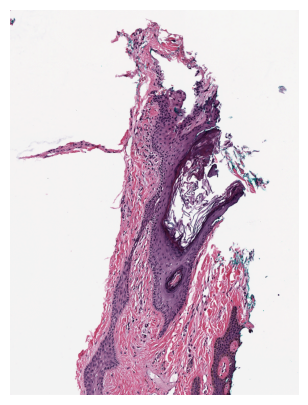

In [4]:
# Load input scene from a scn file
input =  get_driver_test_images("SVS")[0]
scene = slideio.open_slide(input["path"], 'AUTO').get_scene(0)
# Display scene information
show_scene_info(scene)
show_image(scene.read_block(), 500)

## Transform the color space

Property,Value
Name,Image
File Path,./images/CMU-1-Small-Region.svs
"Size (Width, Height)","(2220, 2967)"
Number of Channels,1
Compression,Compression.Jpeg
Data Type,uint8
Magnification,20.0
Resolution,"(4.99e-07, 4.99e-07)"
Z-Resolution,0.0
Time Resolution,0.0


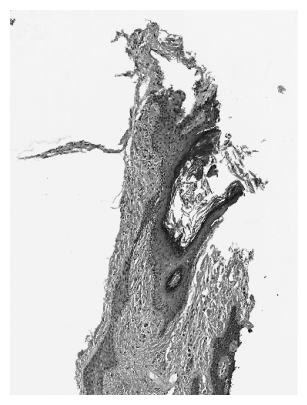

In [5]:
params = slideio.ColorTransformation()
params.color_space = slideio.ColorSpace.GRAY
transformed_scene = scene.apply_transformation([params])
image = transformed_scene.read_block(size=(0,500))
# Display scene information
show_scene_info(transformed_scene)
show_image(image, 500)

## Iterate through all supported color spaces

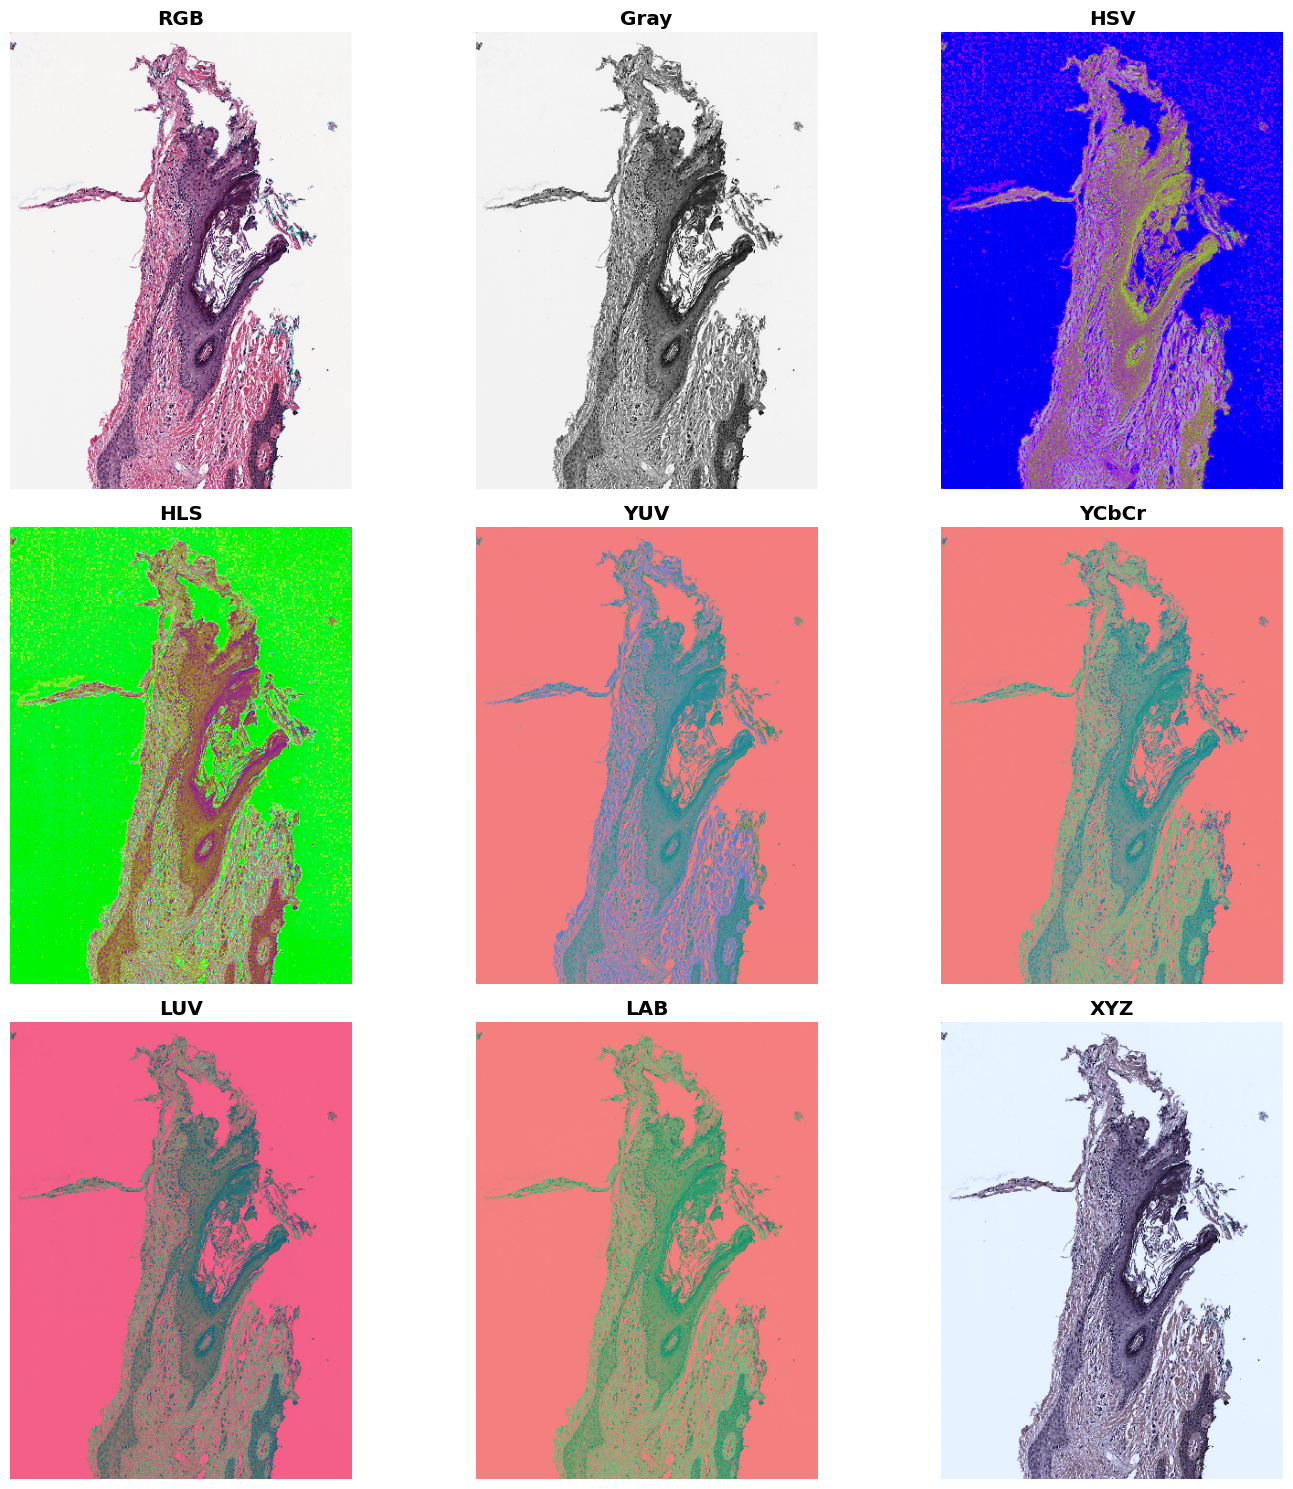

In [6]:
color_spaces = [(slideio.ColorSpace.GRAY, "Gray"), (slideio.ColorSpace.HSV, "HSV"),
                (slideio.ColorSpace.HLS, "HLS"), (slideio.ColorSpace.YUV,"YUV"),
                (slideio.ColorSpace.YCbCr, "YCbCr"), (slideio.ColorSpace.Luv, "LUV"),
                (slideio.ColorSpace.Lab,"LAB"), (slideio.ColorSpace.XYZ,"XYZ")]
titles = ["RGB"]
images = [scene.read_block(size=(0,500))]

params = slideio.ColorTransformation()
for space in color_spaces:
    color_space = space[0]
    title = space[1]
    params.color_space = color_space
    transformed_scene = scene.apply_transformation([params])
    image = transformed_scene.read_block(size=(0,500))
    titles.append(title)
    images.append(image)
show_images(images, titles, 500, 3)